In [1]:
pip install yfinance

     ---------------------------------------- 59.2/59.2 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     ------------------------------------- 499.4/499.4 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [3]:
# Loading two week of Bitcoin to USD exchange rates 
# Here time interval is 1 hr and converting it into a dataframe

In [29]:
BTUSD = yf.download("BTC-INR",start='2022-02-14',end='2023-02-21',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [30]:
BTUSD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,3181188.50,3236255.50,3150407.75,3223218.50,3223218.50,1576364253654
2022-02-15,3223184.25,3358997.00,3213384.50,3350889.75,3350889.75,1708074589226
2022-02-16,3351120.75,3351120.75,3264610.50,3295420.50,3295420.50,1483667185640
2022-02-17,3293562.50,3309531.50,3023259.25,3043476.50,3043476.50,1970523328666
2022-02-18,3044536.50,3053675.50,2960141.75,2989689.50,2989689.50,1740893939354


In [31]:
# Computing Simple Moving Average to perform basic analysis

In [32]:
# Computing 9 day SMA
BTUSD['SMA_9D']= BTUSD['Close'].rolling(window=9,min_periods=1).mean()

In [33]:
# Computing 30 day SMA
BTUSD['SMA_30D'] = BTUSD['Close'].rolling(window=30,min_periods=1).mean()

In [34]:
BTUSD.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_9D,SMA_30D
Date,,,,,,,,
2022-02-14,3181188.50,3236255.50,3150407.75,3223218.50,3223218.50,1576364253654,3.223218e+06,3.223218e+06
2022-02-15,3223184.25,3358997.00,3213384.50,3350889.75,3350889.75,1708074589226,3.287054e+06,3.287054e+06
2022-02-16,3351120.75,3351120.75,3264610.50,3295420.50,3295420.50,1483667185640,3.289843e+06,3.289843e+06
2022-02-17,3293562.50,3309531.50,3023259.25,3043476.50,3043476.50,1970523328666,3.228251e+06,3.228251e+06
2022-02-18,3044536.50,3053675.50,2960141.75,2989689.50,2989689.50,1740893939354,3.180539e+06,3.180539e+06


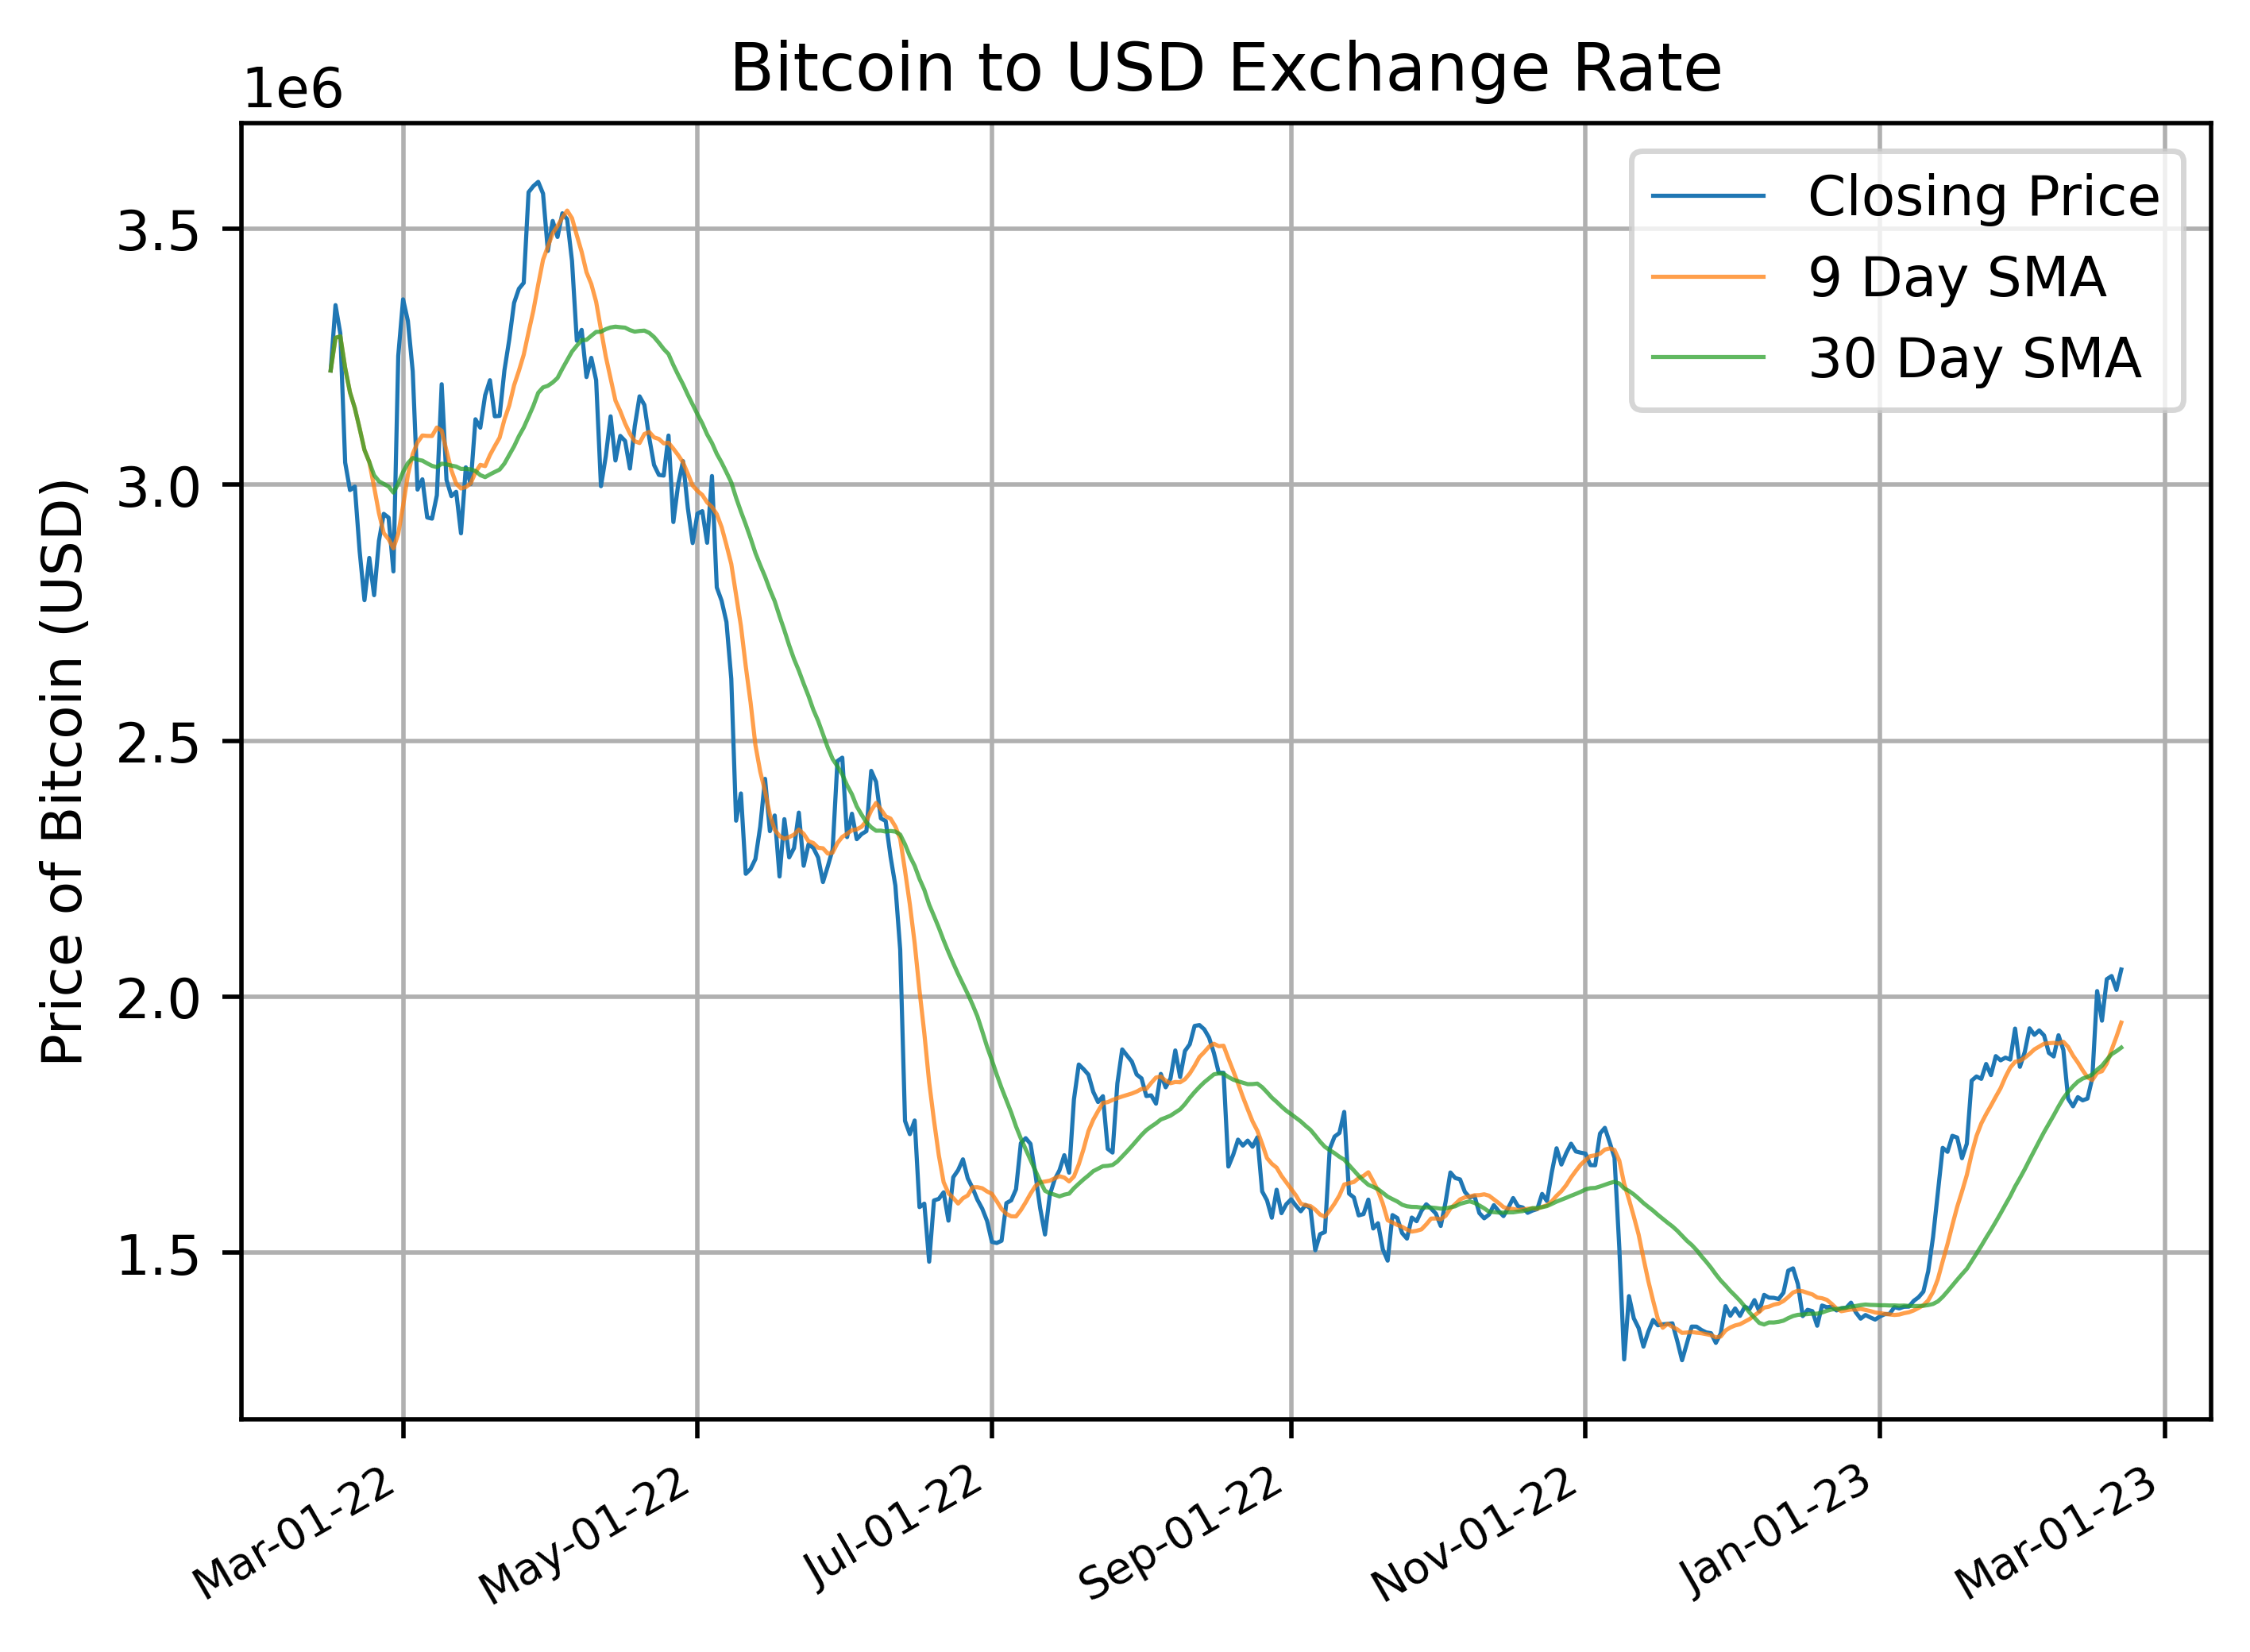

In [35]:
## PLotting Simple Moving Average to understand trends

fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTUSD['Close'], lw=0.75, label='Closing Price') # Added label

"""
You have already seen the code above earlier - we are simply reusing it.
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTUSD['SMA_9D'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTUSD['SMA_30D'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()


# In trading markets, every investment has a sole objective, that is to derive profit. Hence, it is important to understand key indicators to buy an asset at a lower price and then sell it at a higher price. 

IN trading markets , every investment made has sole objective, that is to derive profits. Hence it is important to understand key indicators to buy an asset at a lower price and then sell it at a higher price. 

One of the simplest trading strategies is making use of Simple Moving Average. Here Movie Average Crossover is performed. 

Two moving averages are computed - one with shorter interval period and other with a longer interval period. When the shorter moving average crosses over the longer moving average, it indicates a reversal in trend.

So When shorter moving average is above longer interval one, it indicates a downward trend. When shorter moving average is below the longer one, it indicates a upward trend. 

In [36]:
# Creating a dataframe with same dates for trade signals
trade_signals = pd.DataFrame(index=BTUSD.index)

#Defining intervals for MA
short_interval =10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTUSD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTUSD['Close'].rolling(window=long_interval, min_periods=1).mean()

In [37]:
# Creating a new column with zeroes
trade_signals['Signal']= 0.0

#When STMA is above LTMA, set signal column to 1, else 0
trade_signals['Signal'] = np.where(trade_signals['Short']>trade_signals['Long'],1.0,0.0)

In [38]:
# Creating Position column which tells the action to take
# Here,diff of signal values of one day and previous day is computed
# A positive position indicates buying and negative position indicates to sell

In [39]:
trade_signals['Position'] = trade_signals['Signal'].diff()

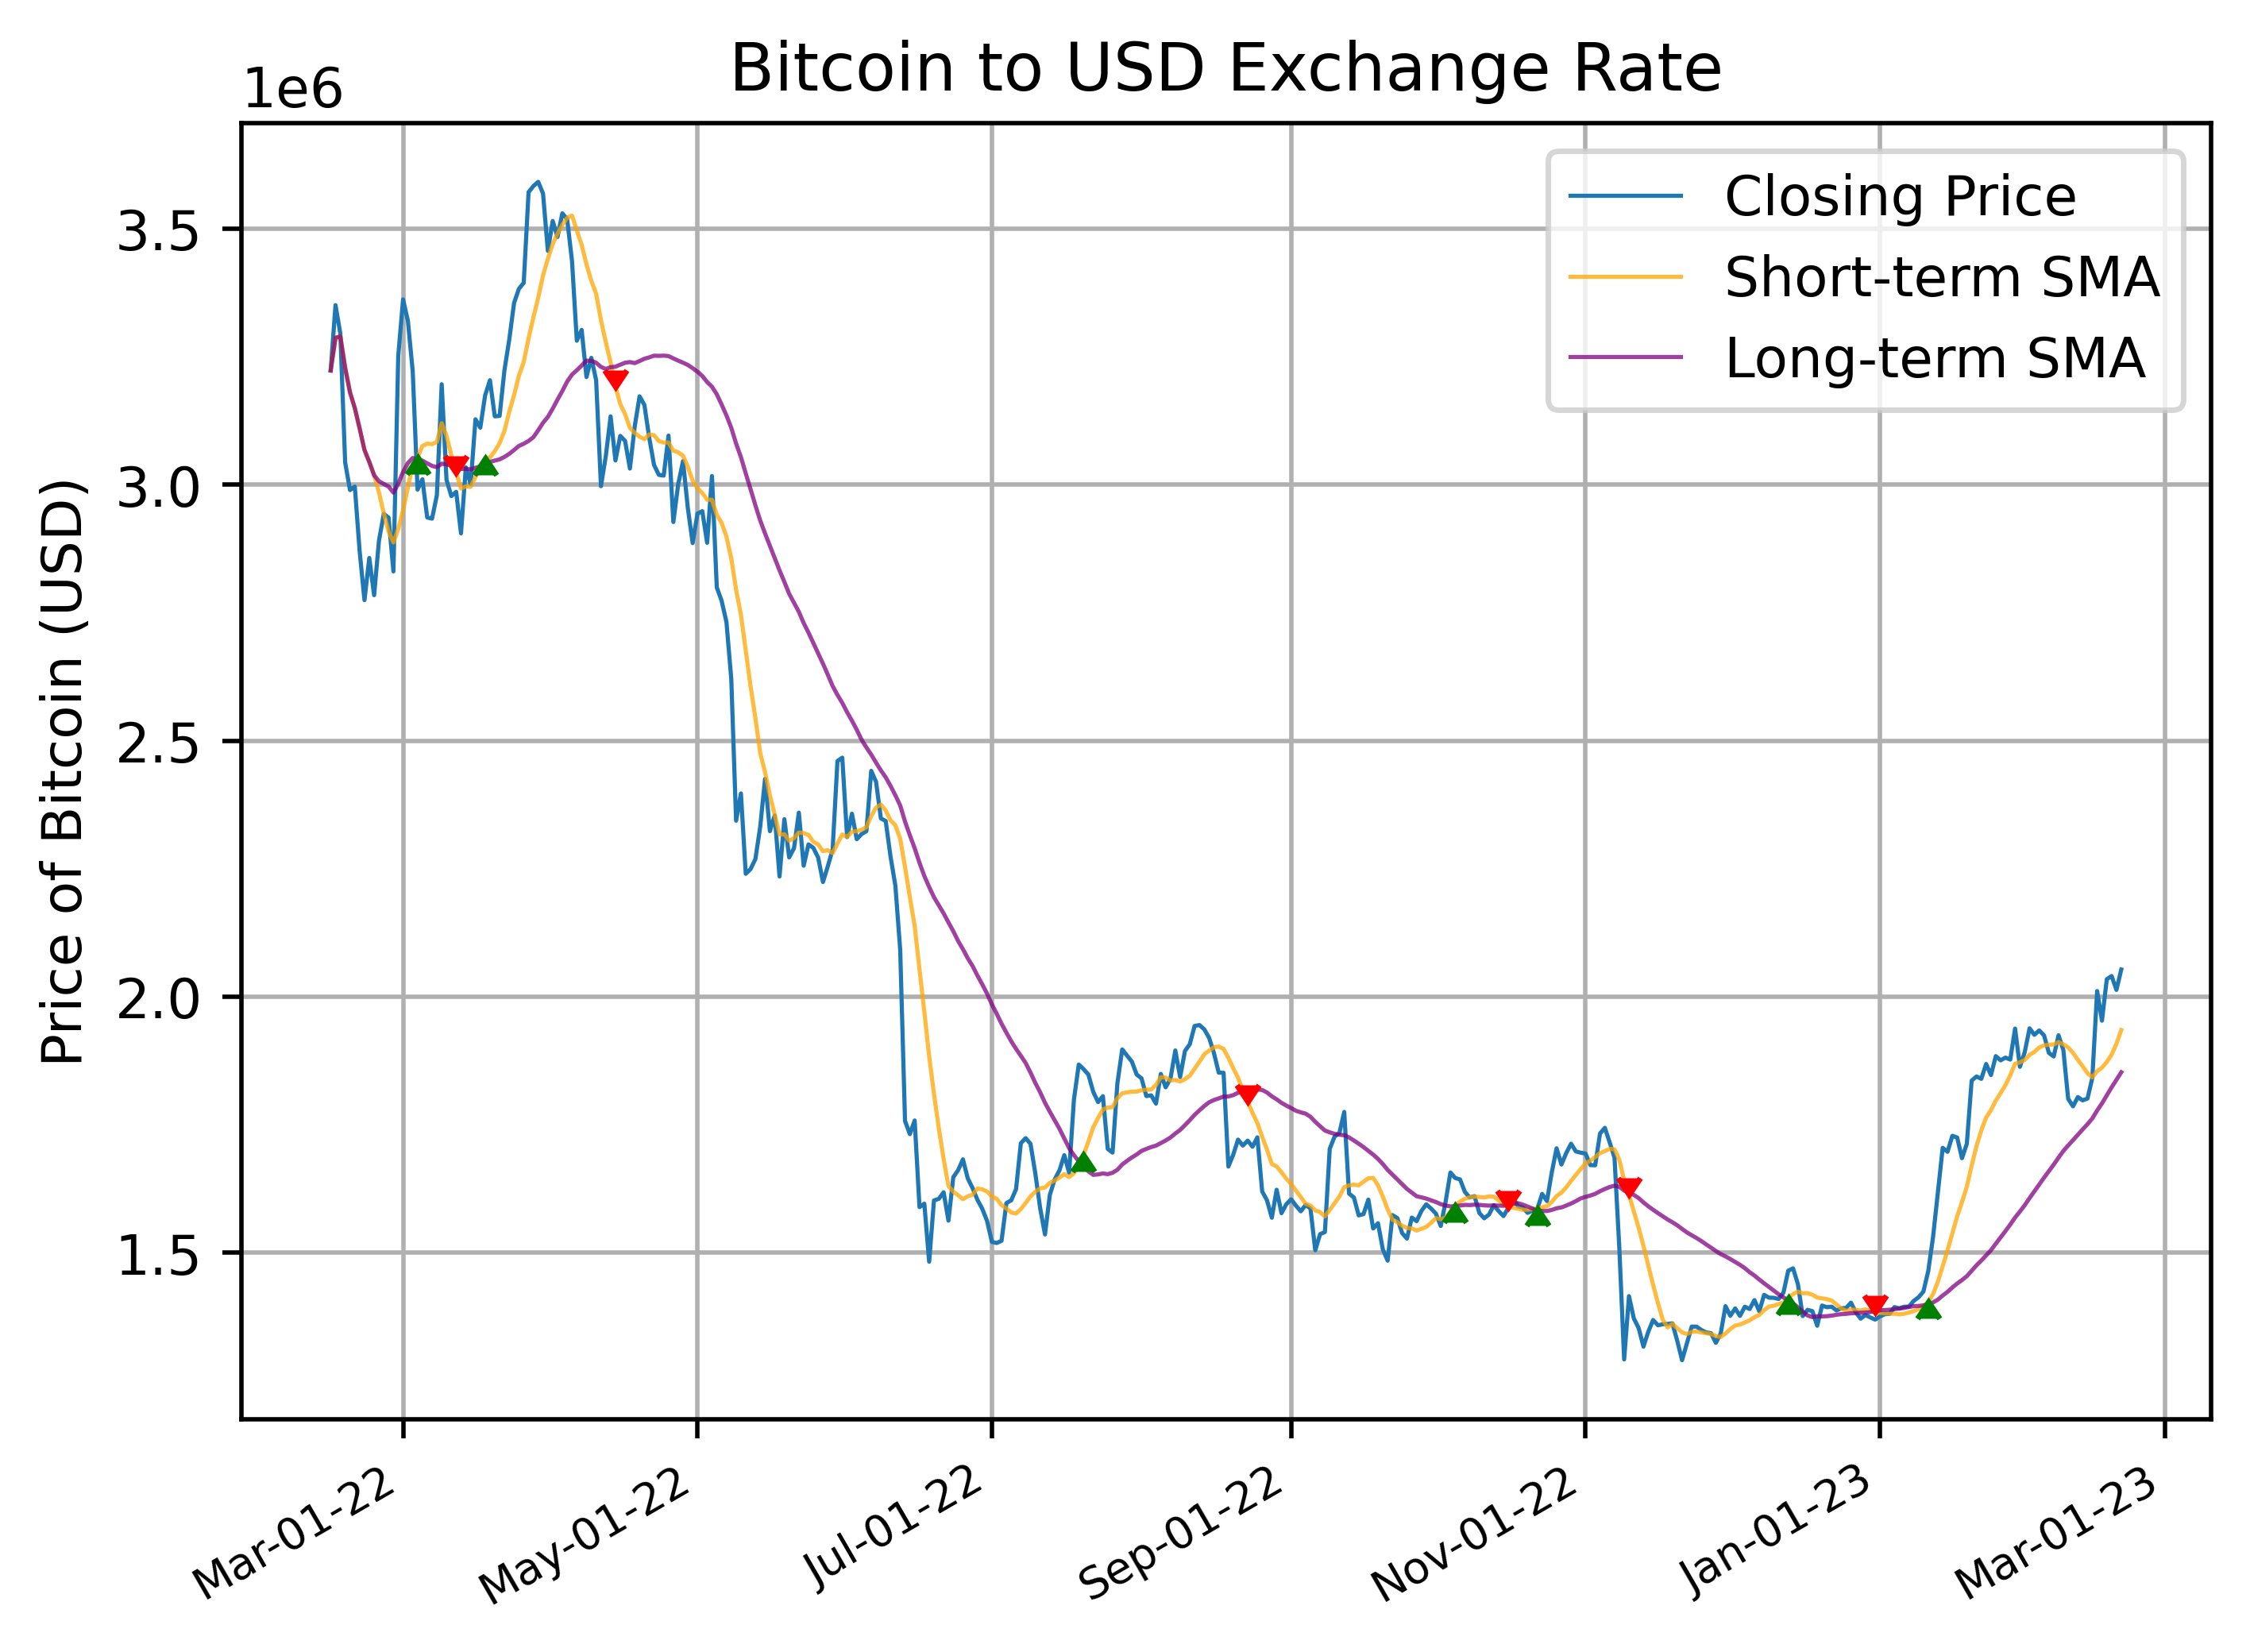

In [40]:
# Plotting to visualize algorithm's trades.
# Plotting Closing price and LTMA,STMA

fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTUSD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()


In [41]:
# Now performing Backtesting to see how the model performs on historical data

In [42]:
## Backtesting over 2023 BTC-USD Data
# Assume we start an account with $25,000 USD

In [43]:
# Defining initial investment in USD
initial_bal = 25000.0

#Creating a DF with dates as index
backtest = pd.DataFrame(index=trade_signals.index)

# Adding column with daily percent return of BTC
# Backtest = current closing price / previous day closing price
backtest['Return'] = BTUSD['Close']/BTUSD['Close'].shift(1)

In [44]:

# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_bal * backtest.Alg_Return.cumprod() # cumulative product

In [45]:
## Visualizing and comparing the performance of the model

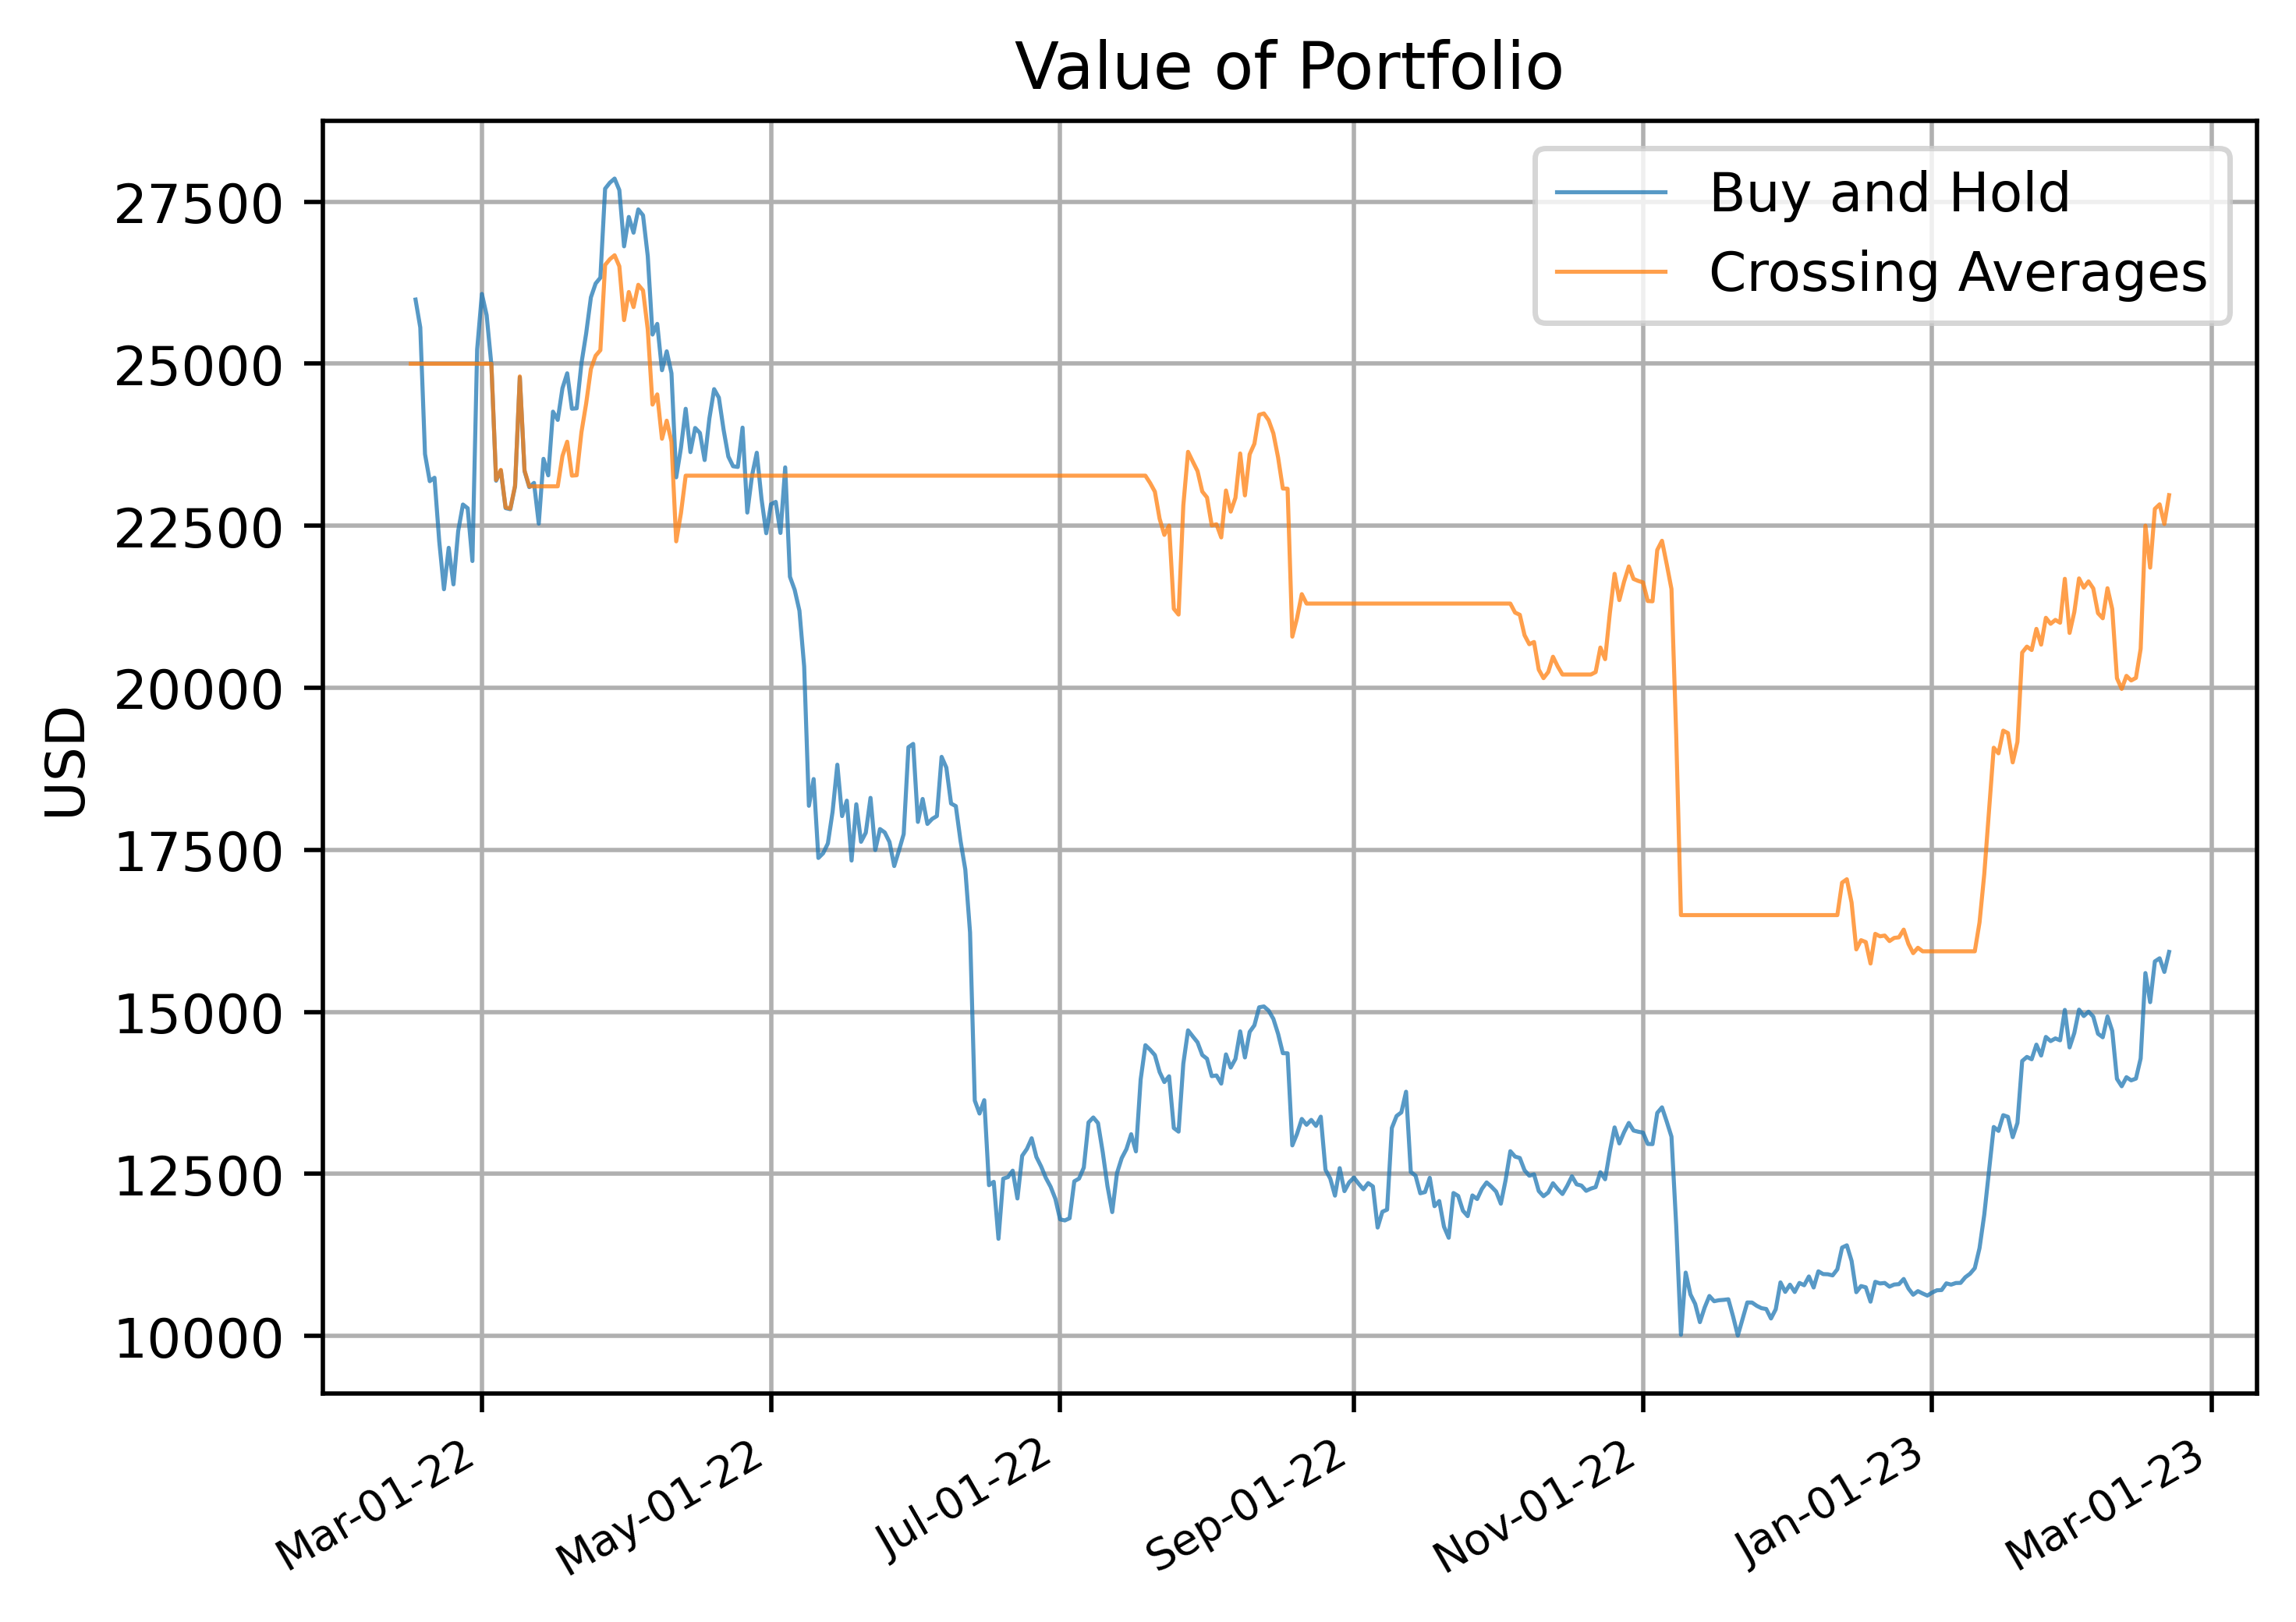

In [46]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_bal*backtest.Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

From the plot it can be clearly understood that there were maximum returns between March and May 2022. But ever since Recession hit the economy in Oct.2022 , the returns are volatile. Hence currently it is very important for the investor because the margin of profit is really low. Instead, the a similar investment can be made in some other legal securities like Shares or Bonds to minimize the risk. Although Bitcoins are known for maximum returns, at this point of time, considering the economic factors it is better to refrain from investing in Crypto market.